In [1]:
import torch

In [4]:
torch.cuda.is_available()

False

In [22]:
a = torch.rand(4) # image (3, 4)
b = torch.rand(4)
a.shape

torch.Size([4])

In [23]:
a, b

(tensor([0.4312, 0.0979, 0.4514, 0.3944]),
 tensor([0.6715, 0.2471, 0.0307, 0.7009]))

In [25]:
# X = (m,n) -> x = (n)

c = torch.stack([a, b], dim = 1)
print(c.shape)
print(c)

torch.Size([4, 2])
tensor([[0.4312, 0.6715],
        [0.0979, 0.2471],
        [0.4514, 0.0307],
        [0.3944, 0.7009]])


# Generate Dataset

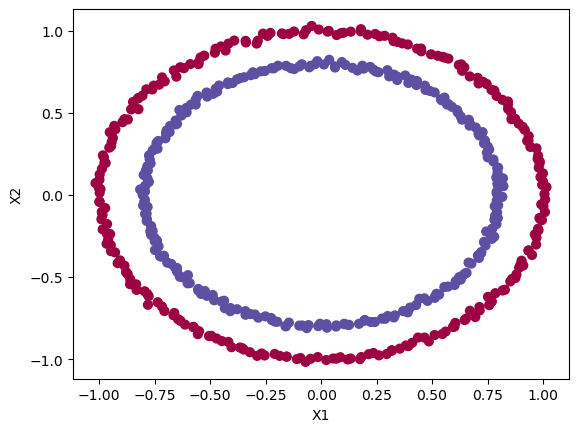

((500, 2), (500,))

In [44]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
X, y = make_circles(n_samples=500, noise = 0.01, random_state= 42)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.Spectral)
plt.xlabel( 'X1')
plt.ylabel( 'X2')
plt.show()
X.shape, y.shape

In [37]:
X_tensors = torch.from_numpy(X).type(torch.float32)
y_tensors = torch.from_numpy(y).type(torch.float32)
X_tensors.shape, y_tensors.shape

(torch.Size([500, 2]), torch.Size([500]))

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tensors, y_tensors, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([400, 2]),
 torch.Size([400]),
 torch.Size([100, 2]),
 torch.Size([100]))

# Build Neural Network

In [50]:
block_1 = torch.nn.Linear(2, 6)
block_2 = torch.nn.Linear(6, 1)
block_1.state_dict()['weight']

tensor([[-0.6387, -0.5668],
        [ 0.4558,  0.3347],
        [-0.5461, -0.1013],
        [ 0.1332,  0.6220],
        [-0.4416, -0.2721],
        [-0.1851, -0.4029]])

In [51]:
block_1(X_tensors).shape

torch.Size([500, 6])

In [52]:
class Classification_model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.block_1 = torch.nn.Linear(2, 6)
        self.block_2 = torch.nn.Linear(6, 1)

    def forward(self, X):
        # X has shape (m, n)
        z1 = self.block_1(X) # (m, 6)
        z2 = self.block_2(z1) # (m, 1)
        return z2
    
model = Classification_model()
model
    

Classification_model(
  (block_1): Linear(in_features=2, out_features=6, bias=True)
  (block_2): Linear(in_features=6, out_features=1, bias=True)
)

In [60]:
model.block_1.state_dict()

OrderedDict([('weight',
              tensor([[-0.4107, -0.3286],
                      [-0.6457,  0.4844],
                      [ 0.6567, -0.2374],
                      [-0.0592,  0.4707],
                      [ 0.5003,  0.6492],
                      [ 0.4061, -0.4119]])),
             ('bias',
              tensor([ 0.0278,  0.0899,  0.5216, -0.6731,  0.5201, -0.0884]))])

In [62]:
model(X_train).shape

torch.Size([400, 1])

# Train model

In [94]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2

y.backward(retain_graph=True)  # Allows multiple backward passes
print(x.grad)  # Should print 6

y.backward()  # Without retain_graph=True, this will cause an error
print(x.grad)  # Now it accumulates, printing 12

tensor(4.)
tensor(8.)


In [ ]:
loss_function = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)    

In [ ]:
epochs_count = []
train_loss_values = []
test_loss_values = []
epochs = 100

for epoch in range(epochs):
    model.train()
    z = model(X_train)
    y_hat_prob = torch.sigmoid(z).squeeze()
    training_loss = loss_function(y_hat_prob, y_train)

    optimizer.zero_grad()
    training_loss.backward()

    optimizer.step()